## Breast Cancer Dataset

By Darshan Shah

The following is the gist of the Neural Network used for Breast Cancer detection:  
**1. Data Gathering:**  
The Data of this Dataset is provided in CSV format which is easily read using panda's read_csv function. Once the data is imported, We've split the data into training dataset and validation/testing dataset with a ratio of training to test data being 85:15.  

**2. Defining the Model**  
Since the nature of dataset is 9 parameters consisting of numeric values, I considered going with a computationally less intensive fully connected layers. With ReLU as an activation function.  
The dropout admist layers helps introduce redundancy naturally in the model.

**3. Model Configuration and Fitting**  
The model is configured with rmsprop as the optimizer and binary cross entrophy as loss function. The batch size and number of Epochs are an outcome of analysising the graphs generated by Tensorboard and tweaking them accordingly to get optimum results. 

## Analysis

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total para

**Plots from Tensorboard**

**Batch Accuracy and Loss:**  

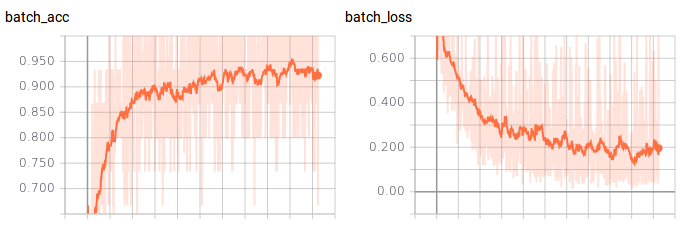

**Accuracy and Loss as Epochs Progress:**  

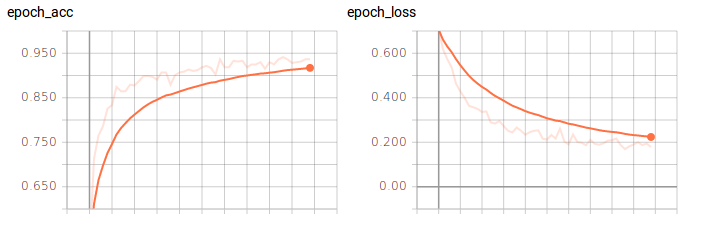

**Validation Accuracy:**  

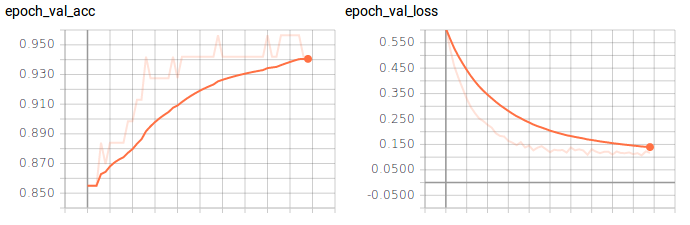


**Biases and Weights of Each Layer:**  
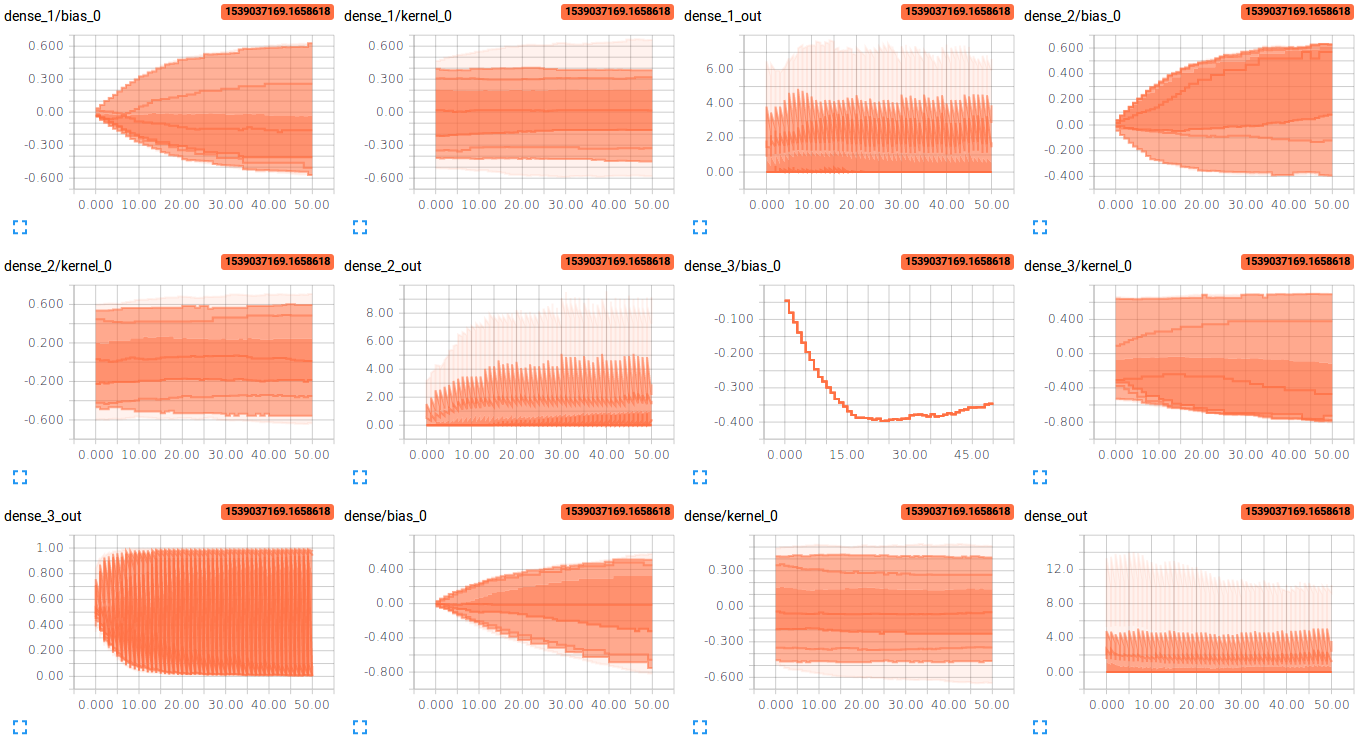


## Code

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

**Data Gathering**

In [2]:
x = pd.read_csv('breastCancerData.csv')
y = pd.read_csv("breastCancerLabels.csv")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)
print("Training Data Size = " + str(len(x_train)))
print("Testing Data Size = " + str(len(x_test)))

Training Data Size = 613
Testing Data Size = 69


**Model**

In [3]:
model = Sequential() # Initialising the ANN
model.add(Dense(16, activation = 'relu', input_dim = 9))
model.add(Dropout(rate=0.25))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(rate=0.10))
model.add(Dense(8, activation = 'relu'))
# model.add(Dropout(rate=0.25))
model.add(Dense(1, activation = 'softmax'))

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

**Model Fitting and Visualisation**

In [9]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),
                          histogram_freq=1, 
                          write_graph=True, 
                          write_images=True)
history = model.fit(x_train, y_train, 
                    batch_size = 15, 
                    epochs = 50,
                    verbose=1, 
                    validation_data = (x_test, y_test), 
                    callbacks=[tensorboard])

Train on 613 samples, validate on 69 samples
Epoch 1/50
613/613 [==============================] - 1s 1ms/step - loss: 0.7062 - acc: 0.5041 - val_loss: 0.6066 - val_acc: 0.8551
Epoch 2/50
613/613 [==============================] - 0s 126us/step - loss: 0.6178 - acc: 0.7129 - val_loss: 0.5280 - val_acc: 0.8551
Epoch 3/50
613/613 [==============================] - 0s 102us/step - loss: 0.5730 - acc: 0.7651 - val_loss: 0.4590 - val_acc: 0.8551
Epoch 4/50
613/613 [==============================] - 0s 82us/step - loss: 0.5362 - acc: 0.7863 - val_loss: 0.4126 - val_acc: 0.8841
Epoch 5/50
613/613 [==============================] - 0s 77us/step - loss: 0.4634 - acc: 0.8254 - val_loss: 0.3711 - val_acc: 0.8696
Epoch 6/50
613/613 [==============================] - 0s 73us/step - loss: 0.4285 - acc: 0.8336 - val_loss: 0.3301 - val_acc: 0.8841
Epoch 7/50
613/613 [==============================] - 0s 71us/step - loss: 0.3995 - acc: 0.8744 - val_loss: 0.2971 - val_acc: 0.8841
Epoch 8/50
613/613 [===

In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print("Loss for Test Data = " + str(val_loss))  # model's loss (error)
print("Accuracy for Test Data = " + str(val_acc))  # model's accuracy

69/69 [==============================] - 0s 823us/step
Loss for Test Data = 0.11702770021730576
Accuracy for Test Data = 0.9420289855072463


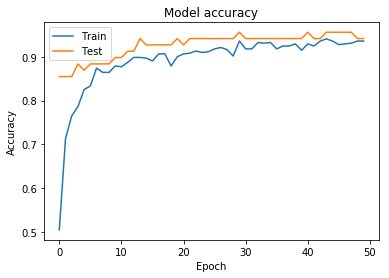

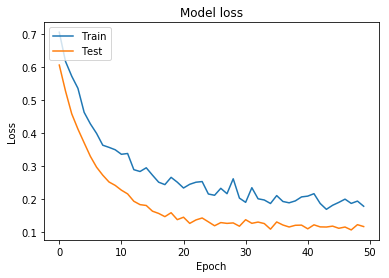

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ ~ ~ ~ ~~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~